# Data Wrangling

### Table Of Contents 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#vizualize">Storing, Analyzing, and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. In this project, I will be using Python and its libraries, to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user **@dog_rates**, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
#import packages 
import pandas as pd 
import numpy as np
import os
import requests 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<a id='gather'></a>
## Gather

### 1.The WeRateDogs Twitter archive  


In [2]:
#read WeRateDogs twitter data from a csv file  
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Predictions File 

In [3]:
#download Image predictions file programmatically using request library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [4]:
#read Image Predictions file 
image_pred = pd.read_csv(url, delimiter='\t')
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### 3. Twitter API data 

In [5]:
#Unfortunately, I do not have access to Twitter API, so I will be using tweet json.text file instead, This the code used to access Twitter API

#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer 
#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)
#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
 #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
       # try:
        #    tweet = api.get_status(tweet_id, tweet_mode='extended')
        #    print("Success")
       #     json.dump(tweet._json, outfile)
       #     outfile.write('\n')
       # except tweepy.TweepError as e:
      #      print("Fail")
      #      fails_dict[tweet_id] = e
      #      pass
#end = timer()
#print(end - start)
#print(fails_dict)``
tweet = pd.read_json(r'tweet-json.txt', lines=True)
tweet_json= pd.DataFrame(tweet, columns = ['id', 'favorite_count','retweet_count'])
tweet_json.sample()

,id,favorite_count,retweet_count
642,793195938047070209,17063,6547


<a id='assess'></a>
## Assess

### Visual Assessment 

In [6]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Programmatic Assessment 

#### 1. The WeRateDogs Twitter archive 

In [9]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
1498,692417313023332352,NaN,NaN,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herschel. He's slightly bigger than ur av...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
1320,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a Beneboom Cumberwiggle. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,None,None,None,None


In [11]:
twitter_archive_data.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Mary         1
Vixen        1
Harry        1
Rupert       1
Keet         1
Name: name, Length: 957, dtype: int64

In [12]:
(twitter_archive_data.duplicated()).sum()

0

#### 2. Image Predictions File 

In [13]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
142,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,0.100554,False,crane,0.084713,False
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
680,683773439333797890,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,1,miniature_pinscher,0.072885,True,Labrador_retriever,0.057866,True,schipperke,0.053257,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True
1614,802239329049477120,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,Eskimo_dog,0.482498,True,Siberian_husky,0.335774,True,malamute,0.134589,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True


#### 3. Twitter API data

In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
(tweet_json.duplicated()).sum()

0

In [17]:
tweet_json.shape[0]

2354

### Quality 
---
**Quality:** issues with content. Low quality data is also known as dirty data.

--- 

#### The WeRateDogs `twitter_archive_data`  table 

- timestamp is captured as a string object not datetime
- incorrect dog names that starts with lower case letters
- None values in dogs name 
- tweet_id is captured as an int not object string  
- archive data contains retweets along with original tweets 
- retweeted_status_id	retweeted_status_user_id , retweeted_status_timestamp, columns are not needed for the anlaysis 

#### Image Predictions File  `image_pred`  table 
- inconsistent capitalization in p1,p2,p3 column, some are written in title case and lowercase
- missing data,  Image Predictions File table has 2075 tweets information 
#### Twitter API  `tweet_json` table 
-  missing data, Twitter API table has 2354 tweets information 



### Tidiness
---
**Tidiness:** issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.



---

- `twitter_archive_data` , `image_pred` , `tweet_json` tables describe one tweet

#### The WeRateDogs `twitter_archive_data`  table 

- four variables (doggo, floofer, pupper, puppo) in one column dog_stage

#### Image Predictions File  `image_pred`  table  
- p1, p2, p3 columns names are not clear 

#### Twitter API  `tweet_json` table  
- id columns name needs to be tweet_id to match with `twitter_archive_data` and `image_pred` table 

<a id='clean'></a>
## Clean

In [18]:
#make copies of data 
twitter_archive_clean = twitter_archive_data.copy() 
image_pred_clean = image_pred.copy() 
tweet_json_clean = tweet_json.copy()  

In [19]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'] 

`twitter_archive_clean` **timestamp is captured as a string object not datetime** 
#### Define
Convert timestamp column into datetime using `to_datetime` method in pandas

#### Code

In [20]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

`twitter_archive_clean`  **incorrect dog names that starts with lower case letters such as** [ by,quite,a,not, an ..etc ]
#### Define
`twitter_archive_clean` drop column with lower case names using `istitle()` method in pandas

#### Code 

In [22]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name'].str.istitle()!= False]

#### Test 

In [23]:
twitter_archive_clean.name.str.istitle().value_counts()

True    2241
Name: name, dtype: int64

`twitter_archive_clean`  **None values in dogs name**
#### Define
Drop rows that have the value "None" as a dog name, using `twitter_archive_clean['name']!= 'None'`

#### Code 

In [24]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name']!= 'None']

#### Test

In [25]:
(twitter_archive_clean.name == 'None').sum()

0

In [26]:
twitter_archive_clean.shape

(1496, 18)

`twitter_archive_clean`  **tweet_id is captured as an int not object string**  
#### Define 
Convert tweet_id into a string object because tweet_id column will not be used for manipulation or calculation

#### Code

In [27]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(int)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 2325
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1496 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1496 non-null   datetime64[ns, UTC]
 4   source                      1496 non-null   object             
 5   text                        1496 non-null   object             
 6   retweeted_status_id         111 non-null    float64            
 7   retweeted_status_user_id    111 non-null    float64            
 8   retweeted_status_timestamp  111 non-null    object             
 9   expanded_urls               1496 non-null   object             
 10  rating_numerator            1496 non-null   int64           

`twitter_archive_clean` **archive data contains retweets along with original tweets**
#### Define
Removing retweets from twitter_archive_clean table using `.match()` to match `RT @dog_rates` pattren in text column

#### Code

In [29]:
twitter_archive_clean.text.str.match('RT @').value_counts()

False    1385
True      111
Name: text, dtype: int64

In [30]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.text.str.match('RT @')!= True]

#### Test 

In [31]:
(twitter_archive_clean.text.str.match('RT @')).sum()

0

`twitter_archive_clean` **retweeted_status_id retweeted_status_user_id , retweeted_status_timestamp, columns are not needed for the anlaysis**
#### Define
Drop retweeted_status_id retweeted_status_user_id , retweeted_status_timestamp using `.drop()` method in pandas 

#### Code

In [32]:
#columns before .drop()
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [33]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True) 

#### Test

In [34]:
#after .drop() 
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [35]:
twitter_archive_clean.shape

(1385, 15)

`twitter_archive_clean`  **four variables (doggo, floofer, pupper, puppo) in one column dog_stage**
#### Define
Create dog_stage column and fill in its values from the pupper, puppo ,floofer and doggo columns 


#### Code

In [36]:
#fill in none values with nan 
twitter_archive_clean = twitter_archive_clean.replace('None', np.nan) 

In [37]:
#create dog_stage column and assign doggo, floofer, pupper and puppo values
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].fillna('').sum(1).replace('', np.nan)

In [38]:
twitter_archive_clean.dog_stage.value_counts()

pupper         121
doggo           38
puppo           16
floofer          5
doggopupper      4
Name: dog_stage, dtype: int64

In [39]:
 twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('doggopupper', 'doggo,pupper')

In [40]:
 twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)

#### Test

In [41]:
twitter_archive_clean.dog_stage.value_counts()

pupper          121
doggo            38
puppo            16
floofer           5
doggo,pupper      4
Name: dog_stage, dtype: int64

In [42]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_stage'],
      dtype='object')

In [43]:
twitter_archive_clean.shape

(1385, 12)

`image_pred_clean` **inconsistent capitalization in p1,p2,p3 column values, some are written in title case and lowercase**
#### Define
`image_pred_clean` convert values in p1 , p2 , p3 column into Title Case letter using `title()` method 

#### Code 

In [44]:
image_pred_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False


In [45]:
image_pred_clean.p1 = image_pred_clean.p1.str.title()
image_pred_clean.p2 = image_pred_clean.p2.str.title()
image_pred_clean.p3 = image_pred_clean.p3.str.title()

#### Test

In [46]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`image_pred` **p1, p2, p3 columns names are not clear**

#### Define 

Rename p1, p2, p3 columns to  prediction_1 ,  prediction_2 ,  prediction_3 using `rename()` 


#### Code

In [47]:
image_pred_clean.rename(columns={'p1':'pred_1','p2':'pred_2','p3':'pred_3'}, inplace=True)

#### Test

In [48]:
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'pred_1', 'p1_conf', 'p1_dog',
       'pred_2', 'p2_conf', 'p2_dog', 'pred_3', 'p3_conf', 'p3_dog'],
      dtype='object')

`tweet_json` **id columns name needs to be tweet_id to match with twitter_archive_data and image_pred table**
#### Define 
Rename id columns to tweet_id using `rename()`

#### Code

In [49]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [50]:
tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

`image_pred` **missing data, Image Predictions File table has 2075 tweets information** 
#### Define 

Create a new data frame and merge `image_pred` with `twitter_archive_clean`

In [51]:
twitter_archive_master = pd.merge(twitter_archive_clean,image_pred_clean,
                            on=['tweet_id'], how='left')

In [52]:
twitter_archive_master.shape

(1385, 23)

In [53]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_stage', 'jpg_url',
       'img_num', 'pred_1', 'p1_conf', 'p1_dog', 'pred_2', 'p2_conf', 'p2_dog',
       'pred_3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [54]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,pred_1,p1_conf,p1_dog,pred_2,p2_conf,p2_dog,pred_3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [55]:
tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

`tweet_json_clean` missing data, Twitter API table has 2354 tweets information 

### Define
Merge tweet_json_clean with twitter_archive_master

#### Code

In [56]:
twitter_archive_master = pd.merge(twitter_archive_master,tweet_json_clean, on=['tweet_id'], how='left')

#### Test

In [57]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,pred_2,p2_conf,p2_dog,pred_3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,666691418707132416,NaN,NaN,2015-11-17 18:56:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,...,0.975401,True,Beagle,0.008687,True,Bloodhound,0.005394,True,196,51
1381,666644823164719104,NaN,NaN,2015-11-17 15:51:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,...,0.044333,True,Pembroke,0.043209,True,West_Highland_White_Terrier,0.038906,True,238,88
1382,666454714377183233,NaN,NaN,2015-11-17 03:16:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,...,0.278954,True,Labrador_Retriever,0.237612,True,Great_Pyrenees,0.171106,True,545,223
1383,666447344410484738,NaN,NaN,2015-11-17 02:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,...,0.322084,True,Giant_Schnauzer,0.287955,True,Labrador_Retriever,0.166331,True,107,23


In [58]:
#store cleaned data to csv
twitter_archive_master.to_csv(r'twitter_archive_master.csv', index = False)

<a id='store'></a>
## Storing, Analyzing, and Visualizing Data

In [59]:
twitter_data = pd.read_csv('twitter_archive_master.csv')

### Evaluating our models performance

> How many times our models **first prediction** is correct?**

In [60]:
twitter_data.p1_dog.value_counts()

True     1040
False     304
Name: p1_dog, dtype: int64

>How many times our models **second prediction** is correct?**

In [61]:
twitter_data.p2_dog.value_counts()

True     1055
False     289
Name: p2_dog, dtype: int64

> How many times our models **third prediction** is correct?  

In [62]:
twitter_data.p3_dog.value_counts()

True     1017
False     327
Name: p3_dog, dtype: int64

> ### Most common words used in @dog_rates twitter account tweets 

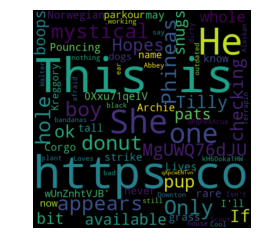

In [63]:
# Create the wordcloud object
text = twitter_data['text'].values 
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


The most common word used in @dog_rates tweets is "This is" 

Text(0.5,1,'Most Common Dog breed in @dog_rates Tweets')

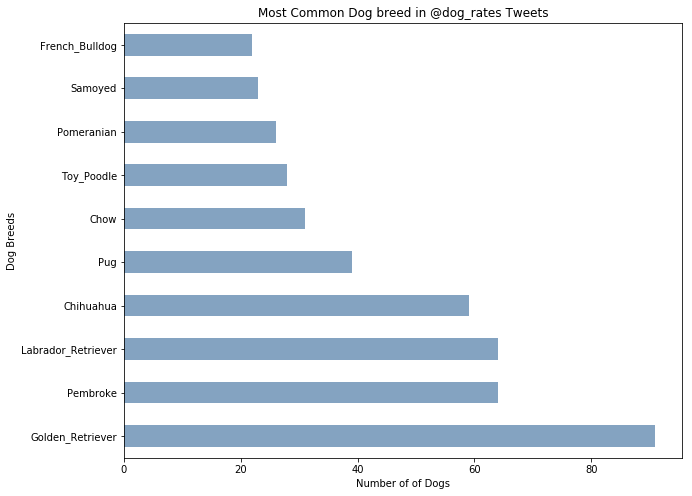

In [64]:
dog_breeds = (twitter_data[twitter_data['p1_dog']==True]).pred_1

result = dog_breeds.value_counts()[:10]

result.plot(kind='barh',figsize=(10,8),color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Number of of Dogs")
plt.ylabel("Dog Breeds")
plt.title("Most Common Dog breed in @dog_rates Tweets")

Golden Retriever is the most common dog breed in @dog_rates retweets

> **Dog Stage @dog_rates tweets**

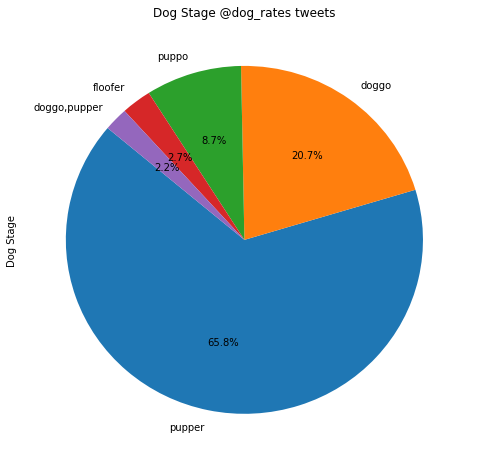

In [65]:
pie_data = twitter_data.dog_stage.value_counts()[:5]
pie_data.plot.pie(autopct='%1.1f%%', startangle=140,figsize=(8,8),title="Dog Stage @dog_rates tweets", label="Dog Stage")

The most common dog stage in @dog_rate tweet is "pupper" by 65.8% of overall tweets

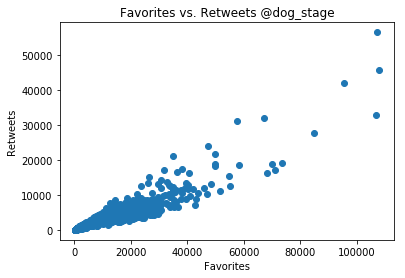

In [66]:
plt.scatter(twitter_data.favorite_count,twitter_data.retweet_count)
plt.title("Favorites vs. Retweets @dog_stage")
plt.xlabel("Favorites")
plt.ylabel("Retweets")
plt.show()

There is a positive corrleation between favorites count and retweet count

### Resources 


- https://python-graph-gallery.com/wordcloud/  
- https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe 
